In [1]:
import os
#########
# INPUT #
#########

displaced_person_file = '/home/ec2-user/SageMaker/mariano/datasets/displaced_persons/simulation_results/auc_results.csv'
assert os.path.isfile(displaced_person_file)

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(displaced_person_file)
df.head()

,Unnamed: 0,representation,Model,Ranking Function,Accuracy,Precision,Recall,F1-Score
0,0,bow,logreg,relevance,0.906281,0.627357,0.850502,0.693947
1,1,bow,logreg,uncertainty,0.900291,0.579390,0.923180,0.686294
2,2,bow,logreg,1quarter_relevance_3quarters_uncertainty,0.903891,0.588670,0.924124,0.697974
3,3,bow,logreg,3quarter_relevance_1quarters_uncertainty,0.906281,0.627357,0.850502,0.693947
4,4,bow,logreg,relevance_with_avg_diversity,0.913363,0.649813,0.822713,0.698241


3quarter_relevance_1quarters_uncertainty


/tmp/ipykernel_82887/1980965133.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


[Text(0, -1.0, ''),
 Text(0, 0.0, '3quarter_relevance_1quarters_uncertainty'),
 Text(0, 1.0, 'relevance_with_avg_diversity'),
 Text(0, 2.0, 'relevance_with_min_diversity'),
 Text(0, 3.0, 'half_relevance_half_uncertainty'),
 Text(0, 4.0, 'uncertainty_with_avg_diversity'),
 Text(0, 5.0, 'uncertainty'),
 Text(0, 6.0, 'relevance'),
 Text(0, 7.0, '1quarter_relevance_3quarters_uncertainty'),
 Text(0, 8.0, 'uncertainty_with_min_diversity'),
 Text(0, 9.0, '')]

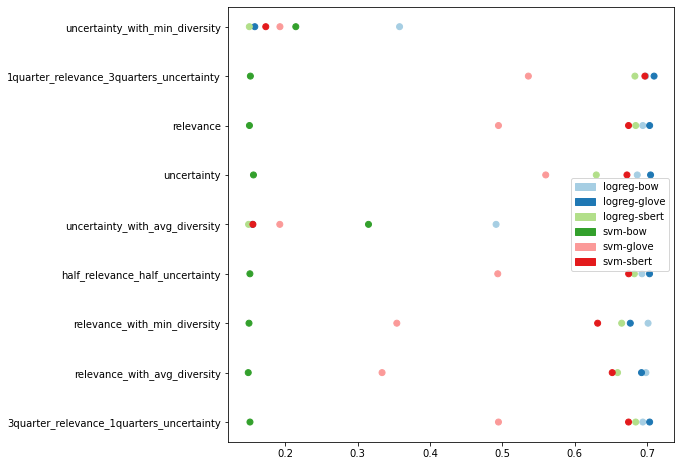

In [7]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

ranking_functions = list(set(df['Ranking Function']))
models = sorted(list(set(df['Model'])))
representations = sorted(list(set(df['representation'])))

fig,ax=plt.subplots(1, figsize=(8,8))
 
model_repr=['logreg-bow', 'logreg-glove', 'logreg-sbert', 'svm-bow', 'svm-glove', 'svm-sbert']
colors = [(166,206,227),
          (31,120,180),
          (178,223,138),
          (51,160,44),
          (251,154,153),
          (227,26,28),
         ]
colors = [(r/255, g/255, b/255) for (r,g,b) in colors]

handles=[]
for color,label in zip(colors,model_repr):
    handles.append(mpatches.Patch(color=color, label=label))
plt.legend(handles=handles)



for ix,rf in enumerate(ranking_functions):
    if ix==0:
        print(rf)
    auxdf = df[df['Ranking Function'] == rf]
    auxdf = auxdf.sort_values(by=['Model', 'representation'])
    assert model_repr==[f'{model}-{representation}' for model,representation in zip(auxdf['Model'], auxdf['representation'])]
    ax.scatter(x=auxdf['F1-Score'], y=[ix]*auxdf.shape[0], c=colors)
#     break
        
labels = [item.get_text() for item in ax.get_yticklabels()]
labels = ['']+ranking_functions

ax.set_yticklabels(labels)